# TASK A3 Result

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [2]:
from modules.helper import *
info = {}
info['projectPath'] = os.getcwd()
info['targetPath'] = "SOO_targets/DP1000_room_SwiftVoce_NDBR50_curve1"
info['resultPath'] = "SOO_results/DP1000_room_SwiftVoce_NDBR50_curve1"

In [3]:
# Add column force,N to the target curve
# Create new dataframe
df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
targetCurve = pd.read_csv(f"{info['targetPath']}/FD_Curve.csv")
df['displacement/mm'] = targetCurve['displacement/mm']
df['force/kN'] = targetCurve['force/N'] * 1e-3
df['force/N'] = targetCurve['force/N']
df.to_csv(f"{info['targetPath']}/FD_Curve.csv",index=False)

# Initial guess simulations

[0.01629709 0.01653018 0.01657875 0.01712093 0.01752782 0.01783455
 0.0182521  0.01883729 0.01918278 0.01954204 0.01982589 0.02016869
 0.02035775 0.02112528 0.02137483 0.02190488 0.02213665 0.02208968
 0.02261307 0.02290768 0.02294833 0.0234644  0.02354978 0.02351795
 0.02390176 0.02385292 0.02401084 0.02393465 0.02424247 0.02442124
 0.02459189 0.02447239 0.02439533 0.02436395 0.02456833 0.02447617
 0.02447661 0.02474494 0.02476085 0.02461068 0.02471174 0.02469201
 0.02469807 0.02469402 0.02464973 0.02482053 0.02498198 0.02501217
 0.02549523 0.0250316  0.02528704 0.02529483 0.02531161 0.02531233
 0.02521049 0.02558425 0.02562391 0.02587299 0.0263741  0.02625422
 0.02605127 0.02598446 0.026287   0.02620164 0.02647611 0.0261612
 0.02678783 0.02626944 0.02644359 0.02620025 0.02645051 0.02655354
 0.02630855 0.02740929 0.02643234 0.02718645 0.02719435 0.02744204
 0.02720262 0.02707949 0.02740275 0.02749667 0.02792465 0.02762045
 0.02770724 0.02782225 0.02786865 0.02818418 0.028021   0.02791

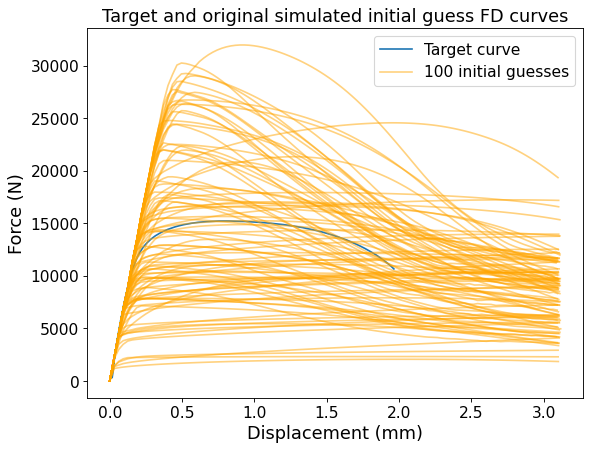

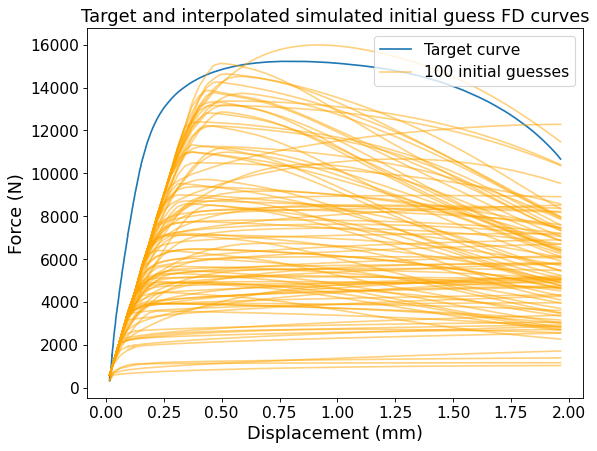

In [6]:
resultPath = info['resultPath']
targetPath = info['targetPath']
# Load csv file
target = pd.read_csv(f"{targetPath}/FD_Curve.csv")
expForce = target['force/N'].to_numpy()
expDisplacement = target['displacement/mm'].to_numpy() 
#print(max(expDisplacement))
targetCurve = {}
targetCurve['displacement'] = expDisplacement
targetCurve['force'] = expForce

print(expDisplacement)
initial_original_FD_Curves = np.load(f"{resultPath}/initial/common/FD_Curves.npy", allow_pickle=True).tolist()
initial_interpolated_FD_Curves = interpolating_FD_Curves(initial_original_FD_Curves, targetCurve)
print(list(initial_interpolated_FD_Curves.values())[0]['displacement'])

fontsize = 14
# print(maxDisp)
# Plotting all FD curves

# print(maxDisp)
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Target curve')
for param in initial_original_FD_Curves:
    plt.plot(initial_original_FD_Curves[param]['displacement'], initial_original_FD_Curves[param]['force'] * 2, color='orange', alpha=0.5,
             #label=param
             )
numberOfInitialSims = len(initial_original_FD_Curves)
plt.plot([],[], color='orange', alpha=0.5, label=f'{numberOfInitialSims} initial guesses')
plt.title('Target and original simulated initial guess FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)


figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Target curve')
for param in initial_interpolated_FD_Curves:
    plt.plot(initial_interpolated_FD_Curves[param]['displacement'], initial_interpolated_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
numberOfInitialSims = len(initial_original_FD_Curves)
plt.plot([],[], color='orange', alpha=0.5, label=f'{numberOfInitialSims} initial guesses')
plt.title('Target and interpolated simulated initial guess FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)

In [5]:
fontsize = 14

# Do the same like cell above but for iteration
# Plotting all FD curves

iteration_original_FD_Curves = np.load(f"{resultPath}/iteration/common/FD_Curves.npy", allow_pickle=True).tolist()
figure(figsize=(8, 6), dpi=80)

for param in iteration_original_FD_Curves:
    plt.plot(iteration_original_FD_Curves[param]['displacement'], iteration_original_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
plt.plot(expDisplacement, expForce, label='Target curve')

numberOfIterations = len(iteration_original_FD_Curves)
plt.plot([],[], color='orange', alpha=0.5, label=f'{numberOfIterations} iterations')
plt.title('Target and original simulated iteration FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)

iteration_interpolated_FD_Curves = interpolating_FD_Curves(iteration_original_FD_Curves, targetCurve)

# Do the same like cell above but for iteration
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)

iter = -1

last_iteration_interpolated_displacement = list(iteration_interpolated_FD_Curves.values())[iter]['displacement']
last_iteration_interpolated_force = list(iteration_interpolated_FD_Curves.values())[iter]['force']

plt.plot(expDisplacement, expForce, label='Target curve')
plt.plot(last_iteration_interpolated_displacement, last_iteration_interpolated_force, color='orange', alpha=0.5)
plt.plot([],[], color='orange', alpha=0.5, label='Last iteration')
plt.title('Target and last simulated iteration FD curves', fontsize=fontsize+2)
plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
plt.ylabel('Force (N)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)

FileNotFoundError: [Errno 2] No such file or directory: 'SOO_results/DP1000_room_SwiftVoce_NDBR50_curve1/iteration/common/FD_Curves.npy'

No iterations satisfy the 3% deviation stop criterion
[]


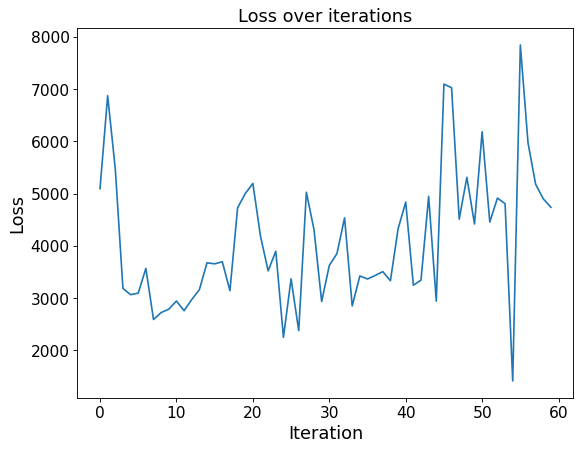

In [ ]:
# Plotting error over iterations
from modules.stoploss import *

deviationPercent = 3
iteration_errors = []
stop_check = []

iteration_interpolated_FD_Curves = interpolating_FD_Curves(iteration_original_FD_Curves, targetCurve)

iter = 1
for param in iteration_original_FD_Curves:
    iteration_errors.append(lossFD(iteration_interpolated_FD_Curves[param]['displacement'], iteration_interpolated_FD_Curves[param]['force'], expForce))
    if stopFD(expForce, iteration_interpolated_FD_Curves[param]['force'], deviationPercent):
        stop_check.append(iter)
    iter += 1

if np.any(len(stop_check)) == 0:
    print(f"No iterations satisfy the {deviationPercent}% deviation stop criterion")
else:
    print(f"Iterations that satisfy the stop criterion: {stop_check}")

figure(figsize=(8, 6), dpi=80)

fontsize=14
plt.plot(iteration_errors, label='Error')
plt.title('Loss over iterations', fontsize=fontsize+2)
#plt.xlim([-1, len(iteration_errors)])
plt.xlabel('Iteration', fontsize=fontsize+2)
plt.ylabel('Loss', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
print(stop_check)


# Create animations

In [ ]:
import imageio
fontsize = 12

# Do the same like cell above but for iteration
# Plotting all FD curves

iteration_original_FD_Curves = np.load(f"{resultPath}/iteration/common/FD_Curves.npy", allow_pickle=True).tolist()

numberOfIterations = len(iteration_original_FD_Curves)

for iter in range(numberOfIterations):
    figure(figsize=(8, 6), dpi=80)

    last_iteration_interpolated_displacement = list(iteration_interpolated_FD_Curves.values())[iter]['displacement']
    last_iteration_interpolated_force = list(iteration_interpolated_FD_Curves.values())[iter]['force']

    plt.plot(expDisplacement, expForce, label='Target curve')
    plt.plot(last_iteration_interpolated_displacement, last_iteration_interpolated_force, color='orange', alpha=0.5)
    plt.plot([],[], color='orange', alpha=0.5, label=f'Iteration {iter + 1}')
    plt.title('Target and last simulated iteration FD curves', fontsize=fontsize+2)
    plt.xlabel('Displacement (mm)', fontsize=fontsize+2)
    plt.ylabel('Force (N)', fontsize=fontsize+2)
    plt.ylim([-500, 12000])
    plt.xlim([-0.1, 3.5])
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize, loc=4)

    plt.savefig(f'notebooks/iteration_evolution/A2_results/iter_{iter+1}.png', 
        transparent = False,  
        facecolor = 'white'
        )
    plt.close()

frames = []
for iter in range(numberOfIterations):
    image = imageio.v2.imread(f'notebooks/iteration_evolution/A2_results/iter_{iter+1}.png')
    frames.append(image)

imageio.mimsave(f'notebooks/iteration_evolution/A2_results.gif', 
                frames, 
                duration = 300,  # ms per image
                loop = 0
                )